<a href="https://colab.research.google.com/github/Praveen-Web-Dev/Renewable-Dataset-Analysis/blob/main/Theme_3_4_4_5_Macro_Level_Rebound_and_Economic_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cleaned_dataset.csv to cleaned_dataset.csv


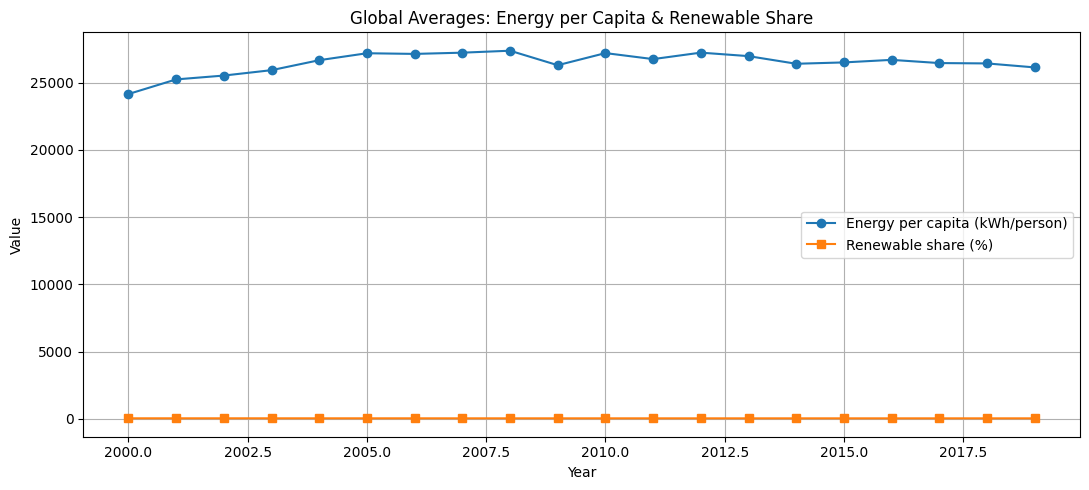

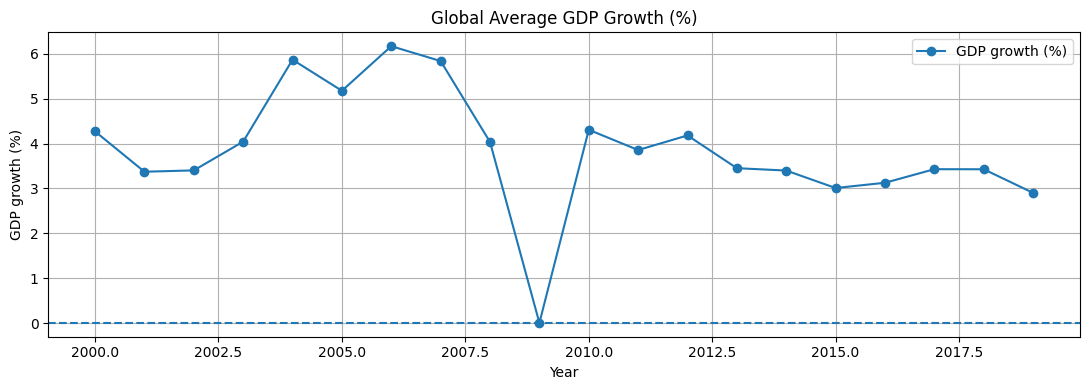


🌍 GLOBAL SUMMARY: 2000 → 2019
Energy per capita (kWh/person): 24157.99 → 26138.50 (8.2%)
Renewable share (%):            35.56 → 32.96 (-7.3%)
GDP growth (%):                 4.27 → 2.90

🔗 GLOBAL CORRELATIONS (country-year level, Pearson):
                   energy_per_capita  gdp_growth_pct  renewable_share
energy_per_capita           1.000000       -0.037794        -0.437065
gdp_growth_pct             -0.037794        1.000000         0.072397
renewable_share            -0.437065        0.072397         1.000000


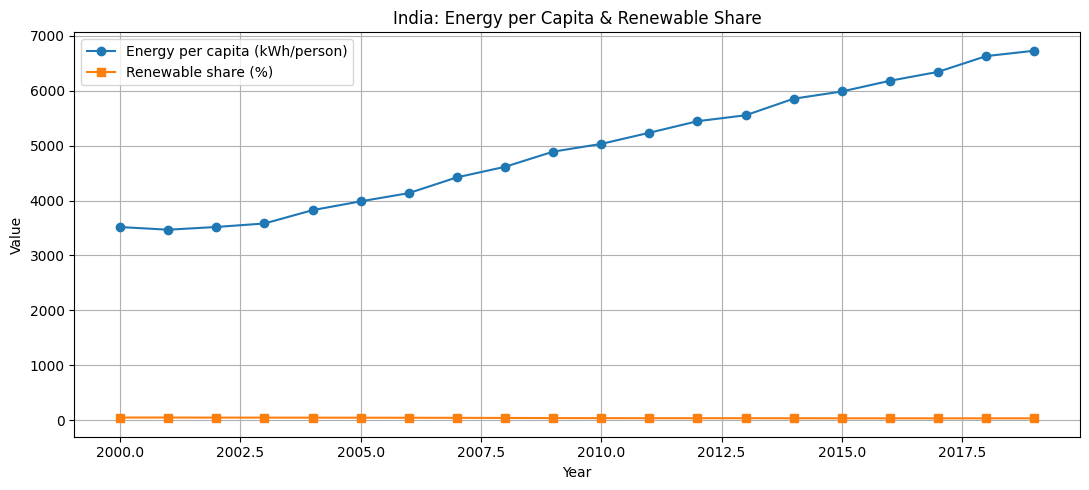

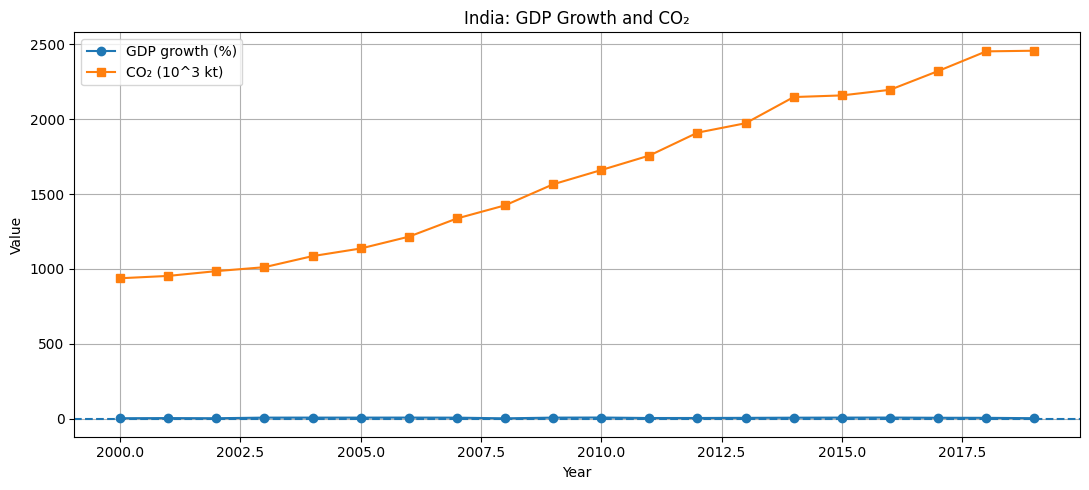


🇮🇳/🇨🇳 India SUMMARY: 2000 → 2019
Energy per capita (kWh/person): 3518.68 → 6731.81 (91.3%)
Renewable share (%):            46.88 → 32.93 (-29.8%)
GDP growth (%):                 3.84 → 4.04


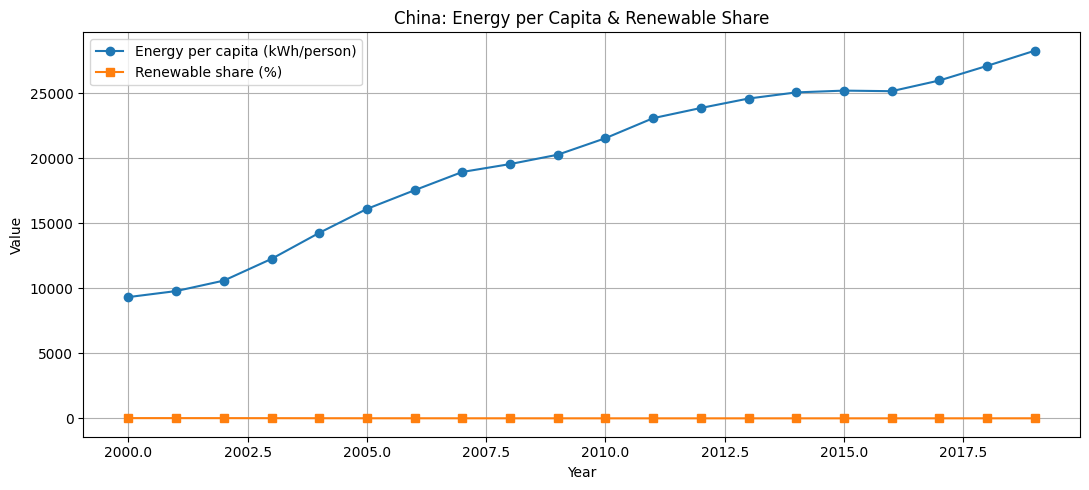

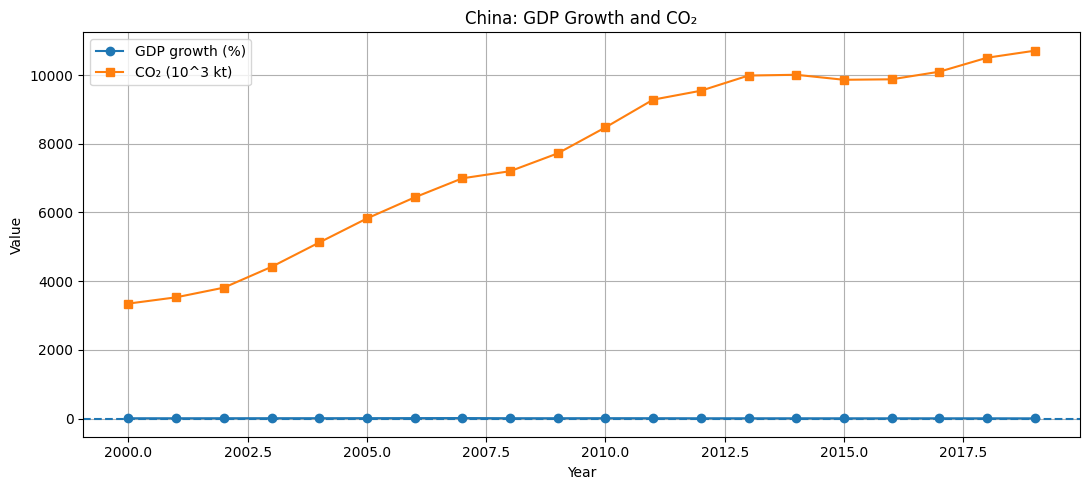


🇮🇳/🇨🇳 China SUMMARY: 2000 → 2019
Energy per capita (kWh/person): 9334.94 → 28277.44 (202.9%)
Renewable share (%):            29.63 → 14.45 (-51.2%)
GDP growth (%):                 8.49 → 5.95


In [2]:
# ===============================
# 4.4.5 Macro-Level Rebound & Growth (Colab one-cell)
# ===============================

# 0) Upload the dataset (run in Colab)
from google.colab import files
uploaded = files.upload()  # Upload your cleaned_dataset.csv here

# 1) Imports
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2) Load dataset (adjust filename if needed)
fname = [k for k in uploaded.keys()][0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))

# 3) Rename key columns for readability (matches your headers)
df = df.rename(columns={
    'entity': 'country',
    'renewable_energy_share_in_the_total_final_energy_consumption_(%)': 'renewable_share',
    'primary_energy_consumption_per_capita_(kwh/person)': 'energy_per_capita',
    'value_co2_emissions_kt_by_country': 'co2_kt',
    'gdp_per_capita': 'gdp_pc',
    'gdp_growth': 'gdp_growth_pct',
    'income_group': 'income',
})

# 4) Keep only what we need; drop missing; optionally remove 2020 if present
cols = ['country','year','income','renewable_share','energy_per_capita','gdp_growth_pct','gdp_pc','co2_kt']
df_macro = df[cols].dropna(subset=['year','renewable_share','energy_per_capita','gdp_growth_pct']).copy()

# If 2020 is present and partial, exclude it
if 2020 in df_macro['year'].unique():
    df_macro = df_macro[df_macro['year'] != 2020]

# 5) GLOBAL AGGREGATION (yearly means)
global_yearly = (
    df_macro
    .groupby('year', as_index=False)
    .agg({
        'renewable_share':'mean',
        'energy_per_capita':'mean',
        'gdp_growth_pct':'mean'
    })
    .sort_values('year')
)

def pct_change(a, b):
    try:
        return (b - a) / a * 100 if a != 0 else np.nan
    except:
        return np.nan

# 6) PLOTS — Global
# Plot 1: Energy per capita & Renewable share (global)
plt.figure(figsize=(11,5))
plt.plot(global_yearly['year'], global_yearly['energy_per_capita'], marker='o', label='Energy per capita (kWh/person)')
plt.plot(global_yearly['year'], global_yearly['renewable_share'], marker='s', label='Renewable share (%)')
plt.title('Global Averages: Energy per Capita & Renewable Share')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: GDP growth (global)
plt.figure(figsize=(11,4))
plt.plot(global_yearly['year'], global_yearly['gdp_growth_pct'], marker='o', label='GDP growth (%)')
plt.axhline(0, linestyle='--')
plt.title('Global Average GDP Growth (%)')
plt.xlabel('Year')
plt.ylabel('GDP growth (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 7) GLOBAL NUMERIC SUMMARY (first vs last available year)
gy = global_yearly
first_y, last_y = int(gy['year'].min()), int(gy['year'].max())
g_first = gy.loc[gy['year']==first_y].iloc[0]
g_last  = gy.loc[gy['year']==last_y].iloc[0]

print(f"\n🌍 GLOBAL SUMMARY: {first_y} → {last_y}")
print(f"Energy per capita (kWh/person): {g_first.energy_per_capita:.2f} → {g_last.energy_per_capita:.2f} "
      f"({pct_change(g_first.energy_per_capita, g_last.energy_per_capita):.1f}%)")
print(f"Renewable share (%):            {g_first.renewable_share:.2f} → {g_last.renewable_share:.2f} "
      f"({pct_change(g_first.renewable_share, g_last.renewable_share):.1f}%)")
print(f"GDP growth (%):                 {g_first.gdp_growth_pct:.2f} → {g_last.gdp_growth_pct:.2f}")

# 8) GLOBAL CORRELATIONS (all country-year observations)
corr_df = df_macro[['energy_per_capita','gdp_growth_pct','renewable_share']].dropna()
corr_matrix = corr_df.corr(method='pearson')
print("\n🔗 GLOBAL CORRELATIONS (country-year level, Pearson):")
print(corr_matrix)

# 9) COUNTRY CASE STUDIES — India & China (if present)
case_countries = [c for c in ['India','China'] if c in df_macro['country'].unique()]
if case_countries:
    for c in case_countries:
        sub = (
            df_macro[df_macro['country']==c]
            [['year','energy_per_capita','renewable_share','gdp_growth_pct','co2_kt']]
            .dropna()
            .sort_values('year')
        )
        if sub.empty:
            continue

        # Plot: Energy per capita & Renewable share
        plt.figure(figsize=(11,5))
        plt.plot(sub['year'], sub['energy_per_capita'], marker='o', label='Energy per capita (kWh/person)')
        plt.plot(sub['year'], sub['renewable_share'], marker='s', label='Renewable share (%)')
        plt.title(f'{c}: Energy per Capita & Renewable Share')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plot: GDP growth & CO2 (scaled)
        plt.figure(figsize=(11,5))
        plt.plot(sub['year'], sub['gdp_growth_pct'], marker='o', label='GDP growth (%)')
        if sub['co2_kt'].notna().any():
            co2_scaled = sub['co2_kt'] / 1000.0  # scale for readability
            plt.plot(sub['year'], co2_scaled, marker='s', label='CO₂ (10^3 kt)')
        plt.axhline(0, linestyle='--')
        plt.title(f'{c}: GDP Growth and CO₂')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Country numeric summary
        fy, ly = int(sub['year'].min()), int(sub['year'].max())
        s_first = sub[sub['year']==fy].iloc[0]
        s_last  = sub[sub['year']==ly].iloc[0]

        print(f"\n🇮🇳/🇨🇳 {c} SUMMARY: {fy} → {ly}")
        print(f"Energy per capita (kWh/person): {s_first.energy_per_capita:.2f} → {s_last.energy_per_capita:.2f} "
              f"({pct_change(s_first.energy_per_capita, s_last.energy_per_capita):.1f}%)")
        print(f"Renewable share (%):            {s_first.renewable_share:.2f} → {s_last.renewable_share:.2f} "
              f"({pct_change(s_first.renewable_share, s_last.renewable_share):.1f}%)")
        print(f"GDP growth (%):                 {s_first.gdp_growth_pct:.2f} → {s_last.gdp_growth_pct:.2f}")
else:
    print("\nℹ️ India/China not found in this dataset. You can change `case_countries` to other countries that exist.")
